In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


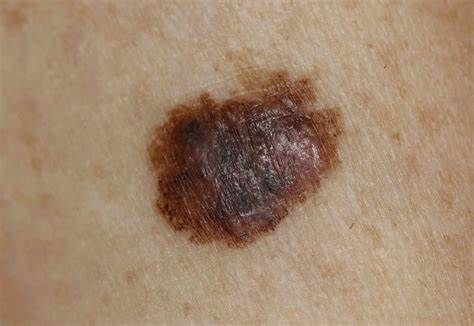

In [3]:
# Importing the Xception model from keras.applications module
model_builder = keras.applications.xception.Xception
# Defining the image size to be used for resizing images to match the input size required by the Xception model
img_size = (299, 299)
# Using the preprocess_input function specific to Xception to preprocess input images (e.g., scaling pixel values)
preprocess_input = keras.applications.xception.preprocess_input
# Using the decode_predictions function to decode the model's output and convert the predictions into human-readable class labels
decode_predictions = keras.applications.xception.decode_predictions
# Defining the name of the last convolutional layer in the Xception model for use in techniques such as Grad-CAM
last_conv_layer_name = "block14_sepconv2_act"
#img_path = keras.utils.get_file("C:\\Users\\mdsha\\Downloads\\OIP.jpg"  # File path to the image you want to load)

# Specify the URL of the image you want to download
img_path ="/content/drive/MyDrive/Jupyter Notebook Research Code/HeatMap/skincancer.jpg"  # URL of the image to download

# Displaying the image from the specified file path
display(Image(img_path))


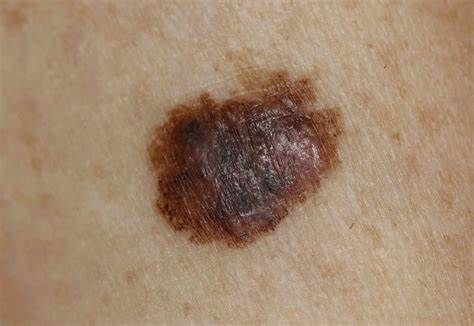

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input, decode_predictions
from tensorflow.keras import layers
import tensorflow as tf

# Importing the DenseNet121 model from keras.applications module
model_builder = DenseNet121
# Defining the image size to be used for resizing images to match the input size required by DenseNet121
img_size = (224, 224)  # DenseNet121 uses 224x224 input size
# Using the preprocess_input function specific to DenseNet121 to preprocess input images
preprocess_input = preprocess_input
# Using the decode_predictions function to decode the model's output and convert the predictions into human-readable class labels
decode_predictions = decode_predictions
# Defining the name of the last convolutional layer in DenseNet121 for use in techniques such as Grad-CAM
last_conv_layer_name = "conv5_block16_concat"  # The name of the last convolutional layer in DenseNet121

# Load the DenseNet121 model with ImageNet weights and exclude the top classification layers
base_model = model_builder(weights='imagenet', include_top=True, input_shape=(224, 224, 3))
# Specify the local file path

img_path ="/content/drive/MyDrive/Jupyter Notebook Research Code/HeatMap/skincancer.jpg"

# Display the image from the specified file path
display(Image(img_path))

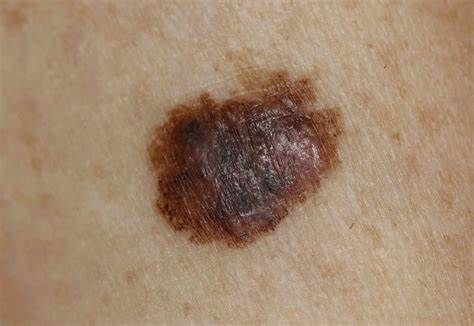

In [3]:
from tensorflow import keras
from IPython.display import Image, display

# Importing the VGG16 model from keras.applications module
model_builder = keras.applications.vgg16.VGG16
# Defining the image size to be used for resizing images to match the input size required by the VGG16 model
img_size = (224, 224)  # VGG16 uses 224x224 input size
# Using the preprocess_input function specific to VGG16 to preprocess input images
preprocess_input = keras.applications.vgg16.preprocess_input
# Using the decode_predictions function to decode the model's output and convert the predictions into human-readable class labels
decode_predictions = keras.applications.vgg16.decode_predictions
# Defining the name of the last convolutional layer in the VGG16 model for use in techniques such as Grad-CAM
last_conv_layer_name = "block5_conv3"  # The name of the last convolutional layer in VGG16

# Specify the local file path
img_path ="/content/drive/MyDrive/Jupyter Notebook Research Code/HeatMap/skincancer.jpg"

# Display the image from the specified file path
display(Image(img_path))


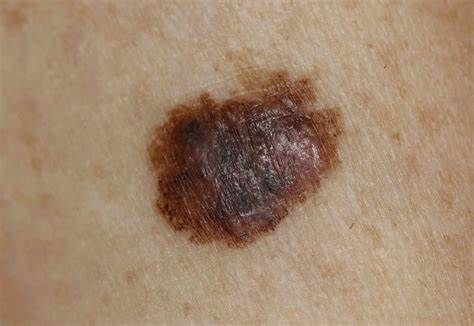

In [3]:
# Importing the ResNet50 model from keras.applications module
model_builder = keras.applications.ResNet50
# Defining the image size to be used for resizing images to match the input size required by the ResNet50 model
img_size = (224, 224)  # ResNet50 uses 224x224 input size
# Using the preprocess_input function specific to ResNet50 to preprocess input images
preprocess_input = keras.applications.resnet50.preprocess_input
# Using the decode_predictions function to decode the model's output and convert the predictions into human-readable class labels
decode_predictions = keras.applications.resnet50.decode_predictions
# Defining the name of the last convolutional layer in the ResNet50 model for use in techniques such as Grad-CAM
last_conv_layer_name = "conv5_block3_out"  # The name of the last convolutional layer in ResNet50

# Load the pre-trained ResNet50 model without the top classification layers
base_model = model_builder(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Specify the local file path
img_path ="/content/drive/MyDrive/Jupyter Notebook Research Code/HeatMap/skincancer.jpg"

# Display the image from the specified file path
display(Image(img_path))

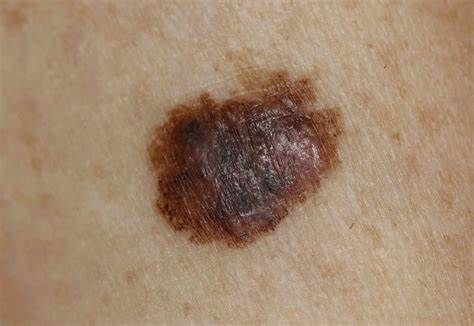

In [3]:
# Importing the InceptionV3 model from keras.applications module
model_builder = keras.applications.InceptionV3
# Defining the image size to be used for resizing images to match the input size required by the InceptionV3 model
img_size = (299, 299)  # InceptionV3 uses 299x299 input size
# Using the preprocess_input function specific to InceptionV3 to preprocess input images
preprocess_input = keras.applications.inception_v3.preprocess_input
# Using the decode_predictions function to decode the model's output and convert the predictions into human-readable class labels
decode_predictions = keras.applications.inception_v3.decode_predictions
# Defining the name of the last convolutional layer in the InceptionV3 model for use in techniques such as Grad-CAM
last_conv_layer_name = "mixed10"  # The name of the last convolutional layer in InceptionV3

# Specify the local file path
img_path = "/content/drive/MyDrive/Jupyter Notebook Research Code/HeatMap/skincancer.jpg"

# Display the image from the specified file path
display(Image(img_path))

## The Grad-CAM algorithm

In [4]:

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


## Let's test-drive it

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
Predicted: [('n02786058', 'Band_Aid', 9.64205)]


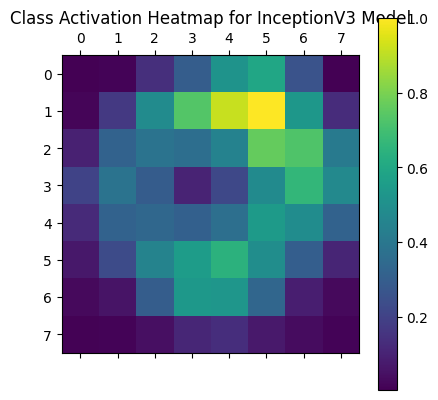

In [5]:

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None


# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
#plt.matshow(heatmap)
#plt.show()
# Display heatmap with title

# Display heatmap with title
plt.matshow(heatmap)
plt.title('Class Activation Heatmap for InceptionV3 Model')  # Change title as needed
plt.colorbar()
plt.show()


## Create a superimposed visualization

<ipython-input-5-82b6e71b983e>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


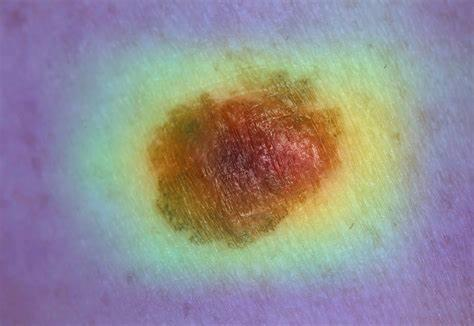

In [5]:

def save_and_display_gradcam(img_path, heatmap, cam_path="skincancer.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

<ipython-input-6-f05c6d608703>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


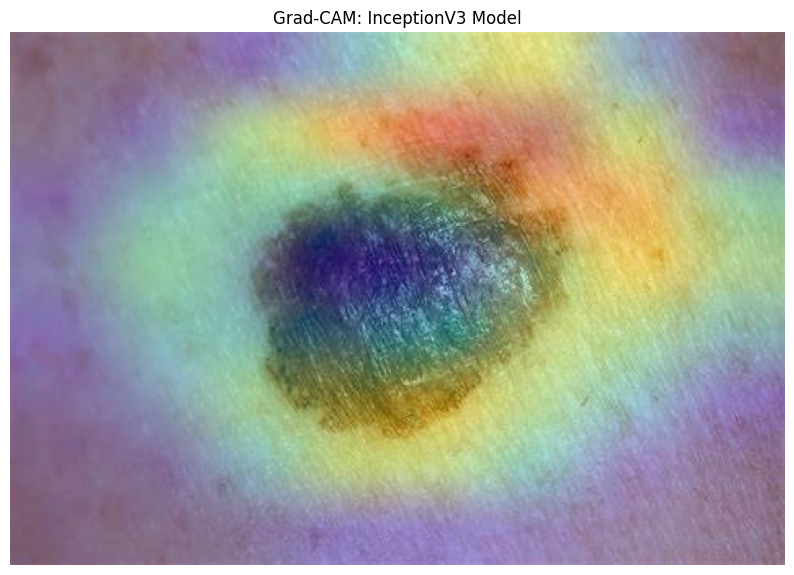

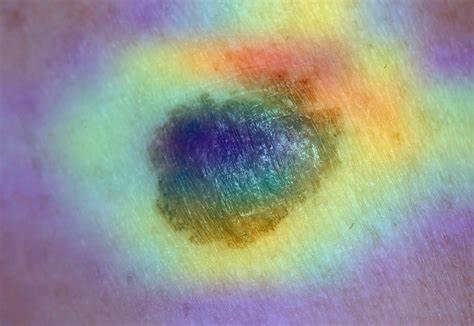

In [6]:
def save_and_display_gradcam(img_path, heatmap, cam_path="skincancer.jpg", alpha=0.4, title="Grad-CAM"):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM with a title
    plt.figure(figsize=(10, 10))
    plt.imshow(superimposed_img)
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

    # Optionally display the image using IPython display
    display(Image(cam_path))

# Example usage:
# Assuming you have computed the `heatmap` already
save_and_display_gradcam(img_path, heatmap, title='Grad-CAM: InceptionV3 Model')


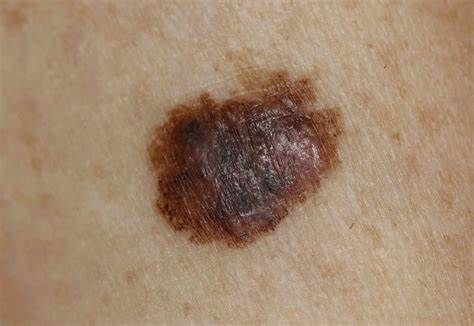

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: [('n01776313', 'tick', 8.705817), ('n02786058', 'Band_Aid', 7.264404)]


In [69]:
img_path =keras.utils.get_file("/content/drive/MyDrive/Jupyter Notebook Research Code/HeatMap/skincancer.jpg","/content/drive/MyDrive/Jupyter Notebook Research Code/HeatMap/skincancer.jpg")



display(Image(img_path))

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Print what the two top predicted classes are
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=2)[0])

<ipython-input-68-82b6e71b983e>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


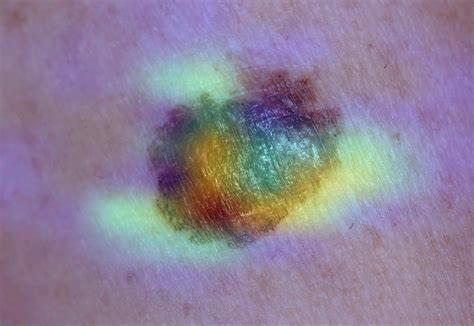

In [70]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=260)

save_and_display_gradcam(img_path, heatmap)

We generate class activation heatmap for "egyptian cat," the class index is 285